### Visualizing data from this [FiveThirtyEight](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) story based on a survey about Star Wars. You can find the original data source on [Github](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

#### In this notebook, I clean up survey data, then explore trends in some of its responses, segmenting by several demographic factors.

Loading the dataset

In [420]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv')

Understanding the column headers

In [421]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Checking the distribution of responses for one of the questions:

In [422]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].unique()

array(['Response', 'Yes', 'No'], dtype=object)

In [423]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

Showing 1186 data rows and 1 header row:

In [424]:
star_wars.shape

(1187, 38)

Filtering dataframe to show those who said they'd seen a star wars movie:

In [425]:
seen_star_wars = star_wars[star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] == 'Yes']

In [426]:
seen_star_wars.shape

(936, 38)

Confirming that 835 respondents indicated which movies they'd seen. 835 is the number that FiveThirtyEight referenced in their story about this survey.

In [427]:
which_star_wars_seen = seen_star_wars.iloc[:,3:9]
which_star_wars_seen = which_star_wars_seen.dropna(axis = 0, how = 'all')

In [428]:
which_star_wars_seen.shape

(835, 6)

Removing rows with null RespondentID values:

In [429]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

Converting "yes" and "no" values to True/False since it's easier to filter with Booleans than with string comparisons:

In [430]:
mapper = {
    'Yes': 'True',
    'No': 'False'
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapper)

In [431]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapper)

Changing values in columns that indicate which movies respondents have seen to be boolean values:

In [432]:
import numpy as np

movie_mapping = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

Updating column names to more accurately reflect values in columns (whether respondents have seen each episode):

In [433]:
star_wars = star_wars.rename(columns = {star_wars.columns[3]: 'seen_1',
                                       star_wars.columns[4]: 'seen_2',
                                       star_wars.columns[5]: 'seen_3',
                                       star_wars.columns[6]: 'seen_4',
                                       star_wars.columns[7]: 'seen_5',
                                       star_wars.columns[8]: 'seen_6'})

Changing columns index 9 to 15 to float type for easier analysis, changing column names to more clearly reflect the data they contain:

In [434]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars = star_wars.rename(columns={
    star_wars.columns[9] : 'ranking_1',
    star_wars.columns[10] : 'ranking_2',
    star_wars.columns[11] : 'ranking_3',
    star_wars.columns[12] : 'ranking_4',
    star_wars.columns[13] : 'ranking_5',
    star_wars.columns[14] : 'ranking_6'
})

Now that we've got numeric data and clear column headers, we can easily find out the mean ranking of each movie:

In [435]:
mean_rankings = star_wars[star_wars.columns[9:15]].mean().sort_values()
mean_rankings

ranking_5    2.513158
ranking_6    3.047847
ranking_4    3.272727
ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
dtype: float64

Looks like Episode V: The Empire Strikes Back is the highest-ranked movie in the survey

Next, we'll build a bar chart showing mean rankings of Star Wars movies in the survey. Ranking_5 (Episode 5), has the lowest mean ranking, which means it's the *best* one:

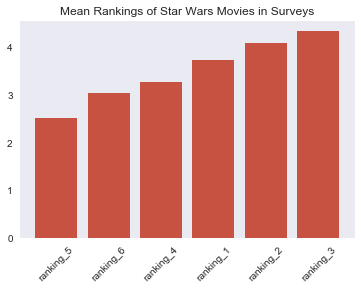

In [436]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
left = np.arange(len(mean_rankings))
height = mean_rankings
ax.bar(left, height, color = (200/255, 82/255, 65/255))
ax.set_title('Mean Rankings of Star Wars Movies in Surveys')
xlabels = list(mean_rankings.index)
ax.set_xticklabels(xlabels, rotation=45)
tick_positions = np.arange(0,6)
ax.set_xticks(tick_positions)
import seaborn as sns
sns.despine(left=True, bottom=True)
sns.set_style("dark")
ax.grid(False)

I would guess Episodes IV - VI (older ones) are ranked higher than I - III (the newer ones) because that's how I would rank them. Survey results support this assessment. 


Next, I'll find out how many people saw each movie, according to the survey, and plot those amounts in a bar chart. Recall that 'seen_1' corresponds to Episode I and 'seen_6' corresponds to Episode VI:

In [437]:
sum_seen = star_wars[star_wars.columns[3:9]].sum()

Text(0.5, 1.0, 'People Who Saw Each Star Wars Episode')

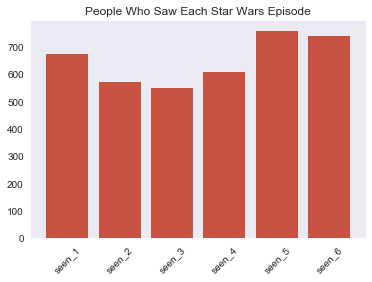

In [438]:
fig, ax = plt.subplots()
ax.bar(range(0,6), sum_seen, color = (200/255, 82/255, 65/255))
xlabels = list(sum_seen.index)
ax.set_xticklabels(xlabels,rotation=45)
ax.set_xticks(range(0,6))
ax.set_title('People Who Saw Each Star Wars Episode')

Below, I analyze how many people in the survey saw each movie, separated by gender:

In [439]:
star_wars_males = star_wars[star_wars['Gender'] == 'Male']
sum_seen_males = star_wars_males[star_wars_males.columns[3:9]].sum()
star_wars_females = star_wars[star_wars['Gender'] == 'Female']
sum_seen_females = star_wars_females[star_wars_females.columns[3:9]].sum()

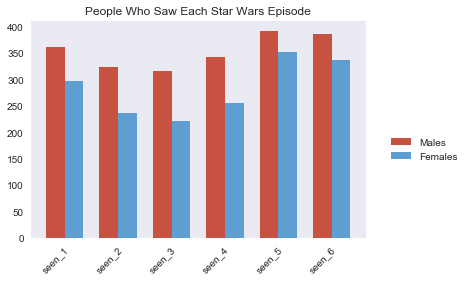

In [440]:
fig, ax = plt.subplots()
width = 0.35
bar_positions = np.arange(6)
ax.bar(bar_positions, sum_seen_males, width = 0.35, color = (200/255, 82/255, 65/255))
ax.bar(bar_positions + width, sum_seen_females, width = 0.35, color = (95/255,158/255,209/255))
xlabels = list(sum_seen_males.index)
ax.set_xticklabels(xlabels,rotation=45)
ax.set_xticks(np.arange(6))
ax.set_title('People Who Saw Each Star Wars Episode')
ax.legend(['Males', 'Females'], bbox_to_anchor=(1.05, 0.5))


Now re-doing the analysis of mean rankings of each movie to see any difference between genders' rankings:

In [441]:
mean_rankings_males = star_wars_males[star_wars_males.columns[9:15]].mean().sort_values()
mean_rankings_females = star_wars_females[star_wars_females.columns[9:15]].mean().sort_values()


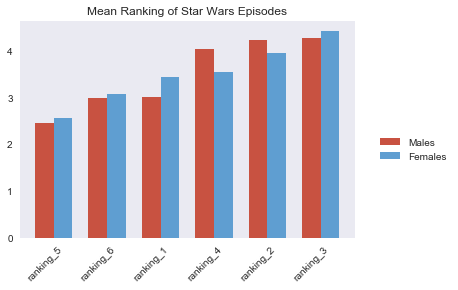

In [442]:
fig, ax = plt.subplots()
width = 0.35
bar_positions = np.arange(6)
ax.bar(bar_positions, mean_rankings_males, width = 0.35, color = (200/255, 82/255, 65/255))
ax.bar(bar_positions + width, mean_rankings_females, width = 0.35, color = (95/255,158/255,209/255))
xlabels = list(mean_rankings_females.index)
ax.set_xticklabels(xlabels,rotation=45)
ax.set_xticks(np.arange(6))
ax.set_title('Mean Ranking of Star Wars Episodes')
ax.legend(['Males', 'Females'], bbox_to_anchor=(1.05, 0.5))


It makes sense that the highest number of males saw Episode V and they rated it the best one. It's curious that females more highly rated Episodes IV and II than males, despite not having reported seeing it more than males. 

In the next chart, I show the correlation between education level and whether survey respondents had seen at least one Star Wars Episode.

In [443]:
index = (['Some college or Associate degree', 'Bachelor degree','Graduate degree', 'High school degree',
          'Less than high school degree'])
seen_by_ed_level = []

for i in index:
    
    segment = star_wars[star_wars['Education'] == i]
    segment_fan = segment[segment['Have you seen any of the 6 films in the Star Wars franchise?'] == 'True']
    segment_fan_per = (len(segment_fan) / len(segment))*100
    seen_by_ed_level.append(segment_fan_per)
    
seen_by_ed_level = pd.Series(seen_by_ed_level, index=index).sort_values()


Text(0.5, 1.0, 'Share Who Saw At Least One Star Wars Episode')

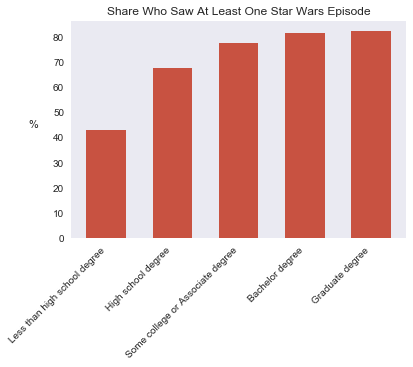

In [444]:
fig, ax = plt.subplots()
width = 0.6
bar_positions = np.arange(5)
ax.bar(bar_positions, seen_per_by_ed_level, width = width, color = (200/255, 82/255, 65/255))
ax.set_xticklabels(seen_per_by_ed_level.index,rotation=45, ha='right')
ax.set_xticks(np.arange(5))
ax.set_ylabel('%', rotation=0, labelpad=20)
ax.set_title('Share Who Saw At Least One Star Wars Episode')



Most strikingly, fewer than 50% of respondents without high school degrees reported seeing even one Star Wars Episode! Next, I'll make a chart showing side-by-side bars to observe the relationship between seeing the movies and being a fan, and how education level might affect that relationship. First, let's see what share of respondents overall are fans:

In [445]:
fan_or_not = star_wars[star_wars.columns[2]].value_counts()
overall_star_wars_fan_percentage = (fan_or_not[0] / (fan_or_not[0] + fan_or_not[1]))*100
overall_star_wars_fan_percentage = overall_star_wars_fan_percentage.round()
overall_star_wars_fan_percentage

66.0

Next, I'll build the series containing the percentage who are fans broken down by education level:

In [446]:
index = (['Some college or Associate degree', 'Bachelor degree','Graduate degree', 'High school degree',
          'Less than high school degree'])
fan_by_ed_level = []

for i in index:
    
    segment = star_wars[star_wars['Education'] == i]
    segment_fan = segment[segment['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 'True']
    segment_fan_per = (len(segment_fan) / len(segment))*100
    fan_by_ed_level.append(segment_fan_per)
    
fan_by_ed_level = pd.Series(fan_by_ed_level, index=index).sort_values()


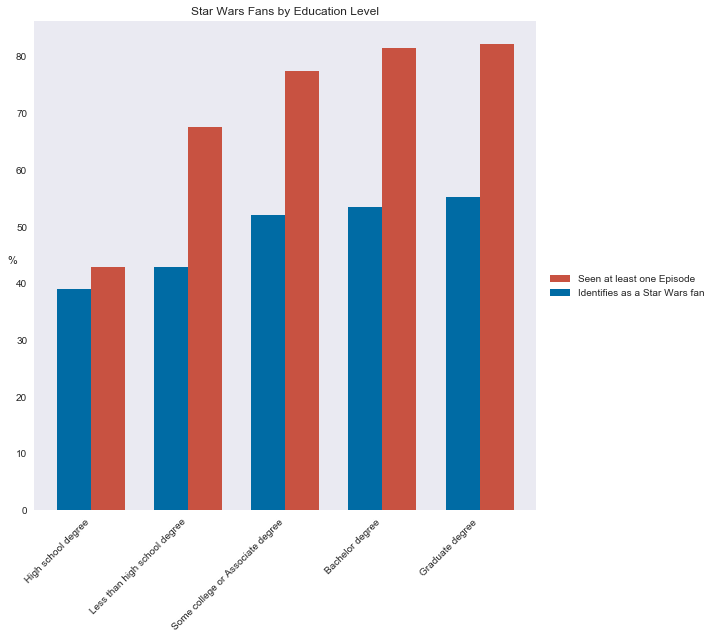

In [447]:
fig, ax = plt.subplots(figsize=(9,9))
width = 0.35
bar_positions = np.arange(5)
ax.bar(bar_positions + width, seen_per_by_ed_level, width = 0.35, color = (200/255, 82/255, 65/255))
ax.bar(bar_positions, fan_by_ed_level, width = 0.35, color = (0/255, 107/255, 164/255))
ax.set_xticklabels(fan_by_ed_level.index,rotation=45, ha='right')
ax.set_xticks(np.arange(5)+0.17)
ax.set_ylabel('%', rotation=0)
ax.set_title('Star Wars Fans by Education Level')
ax.legend(['Seen at least one Episode', 'Identifies as a Star Wars fan'], bbox_to_anchor = [1.01, 0.5])

Next, let's learn whether our survey respondents are more likely to be fans of Star Trek or Star Wars:

In [448]:
fan_or_not = star_wars[star_wars.columns[32]].value_counts()
overall_star_trek_fan_percentage = (fan_or_not[0] / (fan_or_not[0] + fan_or_not[1]))*100
overall_star_trek_fan_percentage = overall_star_trek_fan_percentage.round()
overall_star_trek_fan_percentage

60.0

Earlier, we found 66% of respondents self-identified as Star Wars fans, so respondents are more likely to be Star Wars fans. That's logical because the respondents opted into taking a Star Wars survey, not a Star Trek one. 

Next, let's explore how fanhood breaks down across age groups:

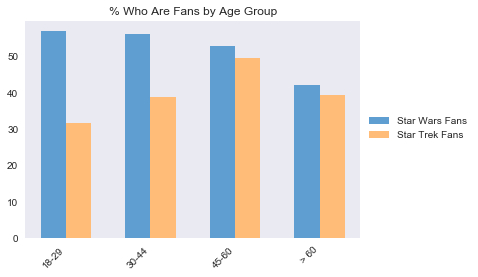

In [449]:
index = ['18-29','30-44','45-60', '> 60']
sw_fan_by_age = []
st_fan_by_age = []

for i in index:
    
    segment = star_wars[star_wars['Age'] == i]
    segment_fan = segment[segment['Do you consider yourself to be a fan of the Star Wars film franchise?'] == 'True']
    segment_fan_per = (len(segment_fan) / len(segment))*100
    sw_fan_by_age.append(segment_fan_per)

for i in index:
    
    segment = star_wars[star_wars['Age'] == i]
    segment_fan = segment[segment['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
    segment_fan_per = (len(segment_fan) / len(segment))*100
    st_fan_by_age.append(segment_fan_per)
    
sw_fan_by_age = pd.Series(sw_fan_by_age, index=index).sort_index()
st_fan_by_age = pd.Series(st_fan_by_age, index=index).sort_index()

fig, ax = plt.subplots()
ax.bar(x = [0,1,2,3], height = sw_fan_by_age, width = 0.3, color = (95/255,158/255,209/255))
ax.bar(x = [n+0.3 for n in range(4)], height = st_fan_by_age, width = 0.3, color = (255/255,188/255,121/255))
ax.set_xticklabels(fan_by_age.index, rotation=45, ha='right')
ax.set_xticks([n+0.15 for n in range(4)])
ax.legend(['Star Wars Fans', 'Star Trek Fans'], bbox_to_anchor = [1.0,0.6])
ax.set_title('% Who Are Fans by Age Group')
import seaborn as sns
sns.despine(bottom=True, left=True)
ax.grid(False)

There are more older Star Trek fans than there are younger ones. The opposite is true for Star Wars. Overall, more respondents favored Star Wars over Star Trek.

Next, I'll visualize which respondents said they were fans of Star Trek and Star Wars, segmented by education level:

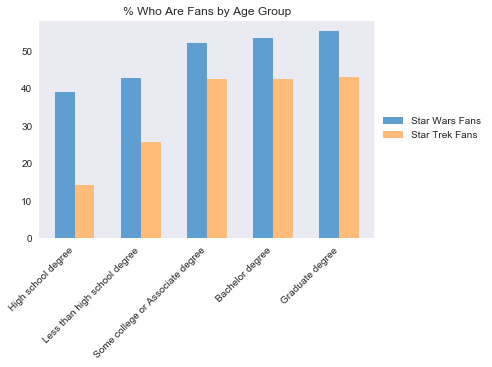

In [450]:
index = (['Some college or Associate degree', 'Bachelor degree','Graduate degree', 'High school degree',
          'Less than high school degree'])
st_fan_by_ed_level = []

for i in index:
    
    segment = star_wars[star_wars['Education'] == i]
    segment_fan = segment[segment['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
    segment_fan_per = (len(segment_fan) / len(segment))*100
    st_fan_by_ed_level.append(segment_fan_per)
    
st_fan_by_ed_level = pd.Series(st_fan_by_ed_level, index=index).sort_values()

fig, ax = plt.subplots()
ax.bar(x = [0,1,2,3,4], height = fan_by_ed_level, width = 0.3, color = (95/255,158/255,209/255))
ax.bar(x = [n+0.3 for n in range(5)], height = st_fan_by_ed_level, width = 0.3, color = (255/255,188/255,121/255))
ax.set_xticklabels(fan_by_ed_level.index, rotation=45, ha='right')
ax.set_xticks([n+0.15 for n in range(5)])
ax.legend(['Star Wars Fans', 'Star Trek Fans'], bbox_to_anchor = [1.0,0.6])
ax.set_title('% Who Are Fans by Age Group')
import seaborn as sns
sns.despine(bottom=True, left=True)
ax.grid(False)

Across the education level spectrum, Star Wars is more popular than Star Trek in the survey responses. The gap narrows for respondents with at least some college education. Perhaps, there's more chance of exposure to Star Trek in college.  